In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 2048.", name="epoch 500")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=500, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2048)              4200448   
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 4,251,673
Trainable params: 4,251,673
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
5/5 [==============================] - ETA: 0s - loss: 4.4634 - mae: 1.6267INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 6s 785ms/step - loss: 4.4634 - mae: 1.6267 - val_loss: 1.8801 - val_mae: 1.0461
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 1.5809 - mae: 1.0441INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 647ms/step - loss: 1.5809 - mae: 1.0441 - val_loss: 1.1173 - val_mae: 0.8449
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 2.5336 - mae: 1.3505INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 617ms/step - loss: 2.5336 - mae: 1.3505 - val_loss: 0.5849 - val_mae: 0.6269
Epoch 4/500
5/5 [==============================] - ETA: 0s - loss: 1.0929 - mae: 0.8857INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 637ms/step - loss: 1.0929 - mae: 0.8857 - val_loss: 0.5765 - val_mae: 0.6241
Epoch 5/500
5/5 [==============================] - ETA: 0s - loss: 0.4825 - mae: 0.5649INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 621ms/step - loss: 0.4825 - mae: 0.5649 - val_loss: 0.5645 - val_mae: 0.6239
Epoch 6/500
5/5 [==============================] - ETA: 0s - loss: 0.4096 - mae: 0.5180INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 601ms/step - loss: 0.4096 - mae: 0.5180 - val_loss: 0.3873 - val_mae: 0.5109
Epoch 7/500
5/5 [==============================] - ETA: 0s - loss: 0.3640 - mae: 0.4938INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 647ms/step - loss: 0.3640 - mae: 0.4938 - val_loss: 0.2523 - val_mae: 0.4098
Epoch 8/500
5/5 [==============================] - ETA: 0s - loss: 0.2619 - mae: 0.4141INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 590ms/step - loss: 0.2619 - mae: 0.4141 - val_loss: 0.2369 - val_mae: 0.3936
Epoch 9/500
5/5 [==============================] - 1s 211ms/step - loss: 0.2257 - mae: 0.3910 - val_loss: 0.2389 - val_mae: 0.4003
Epoch 10/500
5/5 [==============================] - ETA: 0s - loss: 0.2079 - mae: 0.3744INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 599ms/step - loss: 0.2079 - mae: 0.3744 - val_loss: 0.2048 - val_mae: 0.3707
Epoch 11/500
5/5 [==============================] - ETA: 0s - loss: 0.2023 - mae: 0.3710INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 616ms/step - loss: 0.2023 - mae: 0.3710 - val_loss: 0.1911 - val_mae: 0.3609
Epoch 12/500
5/5 [==============================] - ETA: 0s - loss: 0.1923 - mae: 0.3616INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 601ms/step - loss: 0.1923 - mae: 0.3616 - val_loss: 0.1809 - val_mae: 0.3569
Epoch 13/500
5/5 [==============================] - 1s 208ms/step - loss: 0.1986 - mae: 0.3655 - val_loss: 0.1836 - val_mae: 0.3541
Epoch 14/500
5/5 [==============================] - 1s 185ms/step - loss: 0.2000 - mae: 0.3713 - val_loss: 0.1825 - val_mae: 0.3566
Epoch 15/500
5/5 [==============================] - ETA: 0s - loss: 0.1857 - mae: 0.3578INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 594ms/step - loss: 0.1857 - mae: 0.3578 - val_loss: 0.1784 - val_mae: 0.3533
Epoch 16/500
5/5 [==============================] - 1s 210ms/step - loss: 0.1825 - mae: 0.3546 - val_loss: 0.1816 - val_mae: 0.3538
Epoch 17/500
5/5 [==============================] - ETA: 0s - loss: 0.1816 - mae: 0.3522INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 0.1816 - mae: 0.3522 - val_loss: 0.1781 - val_mae: 0.3540
Epoch 18/500
5/5 [==============================] - ETA: 0s - loss: 0.1812 - mae: 0.3533INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 631ms/step - loss: 0.1812 - mae: 0.3533 - val_loss: 0.1767 - val_mae: 0.3490
Epoch 19/500
5/5 [==============================] - 1s 194ms/step - loss: 0.1803 - mae: 0.3524 - val_loss: 0.1771 - val_mae: 0.3510
Epoch 20/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1793 - mae: 0.3519 - val_loss: 0.1781 - val_mae: 0.3497
Epoch 21/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1810 - mae: 0.3519 - val_loss: 0.1769 - val_mae: 0.3543
Epoch 22/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1833 - mae: 0.3560 - val_loss: 0.1780 - val_mae: 0.3495
Epoch 23/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1816 - mae: 0.3531 - val_loss: 0.1777 - val_mae: 0.3520
Epoch 24/500
5/5 [==============================] - ETA: 0s - loss: 0.1809 - mae: 0.3534INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\mod

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 580ms/step - loss: 0.1809 - mae: 0.3534 - val_loss: 0.1749 - val_mae: 0.3490
Epoch 25/500
5/5 [==============================] - 1s 223ms/step - loss: 0.1811 - mae: 0.3530 - val_loss: 0.1782 - val_mae: 0.3541
Epoch 26/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1853 - mae: 0.3566 - val_loss: 0.1927 - val_mae: 0.3596
Epoch 27/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1895 - mae: 0.3585 - val_loss: 0.2231 - val_mae: 0.3920
Epoch 28/500
5/5 [==============================] - 1s 196ms/step - loss: 0.2218 - mae: 0.3807 - val_loss: 0.2066 - val_mae: 0.3707
Epoch 29/500
5/5 [==============================] - 1s 189ms/step - loss: 0.2126 - mae: 0.3797 - val_loss: 0.1850 - val_mae: 0.3608
Epoch 30/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1853 - mae: 0.3574 - val_loss: 0.1774 - val_mae: 0.3511
Epoch 31/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1885 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 663ms/step - loss: 0.1790 - mae: 0.3503 - val_loss: 0.1727 - val_mae: 0.3477
Epoch 40/500
5/5 [==============================] - 1s 208ms/step - loss: 0.1767 - mae: 0.3468 - val_loss: 0.1756 - val_mae: 0.3479
Epoch 41/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1765 - mae: 0.3497 - val_loss: 0.1780 - val_mae: 0.3531
Epoch 42/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1794 - mae: 0.3507 - val_loss: 0.1811 - val_mae: 0.3496
Epoch 43/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1846 - mae: 0.3563 - val_loss: 0.1843 - val_mae: 0.3543
Epoch 44/500
5/5 [==============================] - ETA: 0s - loss: 0.1940 - mae: 0.3654INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 570ms/step - loss: 0.1940 - mae: 0.3654 - val_loss: 0.1725 - val_mae: 0.3469
Epoch 45/500
5/5 [==============================] - 1s 209ms/step - loss: 0.1773 - mae: 0.3485 - val_loss: 0.1731 - val_mae: 0.3469
Epoch 46/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1798 - mae: 0.3501 - val_loss: 0.2010 - val_mae: 0.3681
Epoch 47/500
5/5 [==============================] - 1s 182ms/step - loss: 0.1976 - mae: 0.3671 - val_loss: 0.1877 - val_mae: 0.3583
Epoch 48/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1870 - mae: 0.3584 - val_loss: 0.1771 - val_mae: 0.3504
Epoch 49/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1783 - mae: 0.3493 - val_loss: 0.2098 - val_mae: 0.3746
Epoch 50/500
5/5 [==============================] - 1s 184ms/step - loss: 0.2185 - mae: 0.3854 - val_loss: 0.1776 - val_mae: 0.3466
Epoch 51/500
5/5 [==============================] - 1s 183ms/step - loss: 0.2152 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 572ms/step - loss: 0.1808 - mae: 0.3519 - val_loss: 0.1711 - val_mae: 0.3446
Epoch 59/500
5/5 [==============================] - 1s 231ms/step - loss: 0.1803 - mae: 0.3510 - val_loss: 0.1779 - val_mae: 0.3470
Epoch 60/500
5/5 [==============================] - 1s 196ms/step - loss: 0.1854 - mae: 0.3529 - val_loss: 0.2254 - val_mae: 0.3845
Epoch 61/500
5/5 [==============================] - 1s 191ms/step - loss: 0.2076 - mae: 0.3717 - val_loss: 0.1819 - val_mae: 0.3539
Epoch 62/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1750 - mae: 0.3429 - val_loss: 0.1807 - val_mae: 0.3470
Epoch 63/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1992 - mae: 0.3672 - val_loss: 0.1727 - val_mae: 0.3443
Epoch 64/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1735 - mae: 0.3436 - val_loss: 0.1832 - val_mae: 0.3538
Epoch 65/500
5/5 [==============================] - ETA: 0s - loss: 0.1800 - mae: 0.3496I

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 597ms/step - loss: 0.1800 - mae: 0.3496 - val_loss: 0.1654 - val_mae: 0.3358
Epoch 66/500
5/5 [==============================] - 1s 222ms/step - loss: 0.1754 - mae: 0.3444 - val_loss: 0.1658 - val_mae: 0.3370
Epoch 67/500
5/5 [==============================] - ETA: 0s - loss: 0.1755 - mae: 0.3428INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 624ms/step - loss: 0.1755 - mae: 0.3428 - val_loss: 0.1602 - val_mae: 0.3313
Epoch 68/500
5/5 [==============================] - 1s 231ms/step - loss: 0.1637 - mae: 0.3293 - val_loss: 0.1791 - val_mae: 0.3476
Epoch 69/500
5/5 [==============================] - 1s 192ms/step - loss: 0.1820 - mae: 0.3511 - val_loss: 0.1657 - val_mae: 0.3361
Epoch 70/500
5/5 [==============================] - 1s 191ms/step - loss: 0.1803 - mae: 0.3477 - val_loss: 0.1687 - val_mae: 0.3377
Epoch 71/500
5/5 [==============================] - ETA: 0s - loss: 0.1747 - mae: 0.3422INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 602ms/step - loss: 0.1747 - mae: 0.3422 - val_loss: 0.1480 - val_mae: 0.3202
Epoch 72/500
5/5 [==============================] - 1s 214ms/step - loss: 0.1854 - mae: 0.3496 - val_loss: 0.1890 - val_mae: 0.3535
Epoch 73/500
5/5 [==============================] - 1s 183ms/step - loss: 0.2277 - mae: 0.3860 - val_loss: 0.2412 - val_mae: 0.4050
Epoch 74/500
5/5 [==============================] - 1s 183ms/step - loss: 0.2150 - mae: 0.3757 - val_loss: 0.2426 - val_mae: 0.4077
Epoch 75/500
5/5 [==============================] - 1s 182ms/step - loss: 0.1933 - mae: 0.3568 - val_loss: 0.1924 - val_mae: 0.3593
Epoch 76/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1902 - mae: 0.3603 - val_loss: 0.1686 - val_mae: 0.3416
Epoch 77/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1734 - mae: 0.3439 - val_loss: 0.1841 - val_mae: 0.3481
Epoch 78/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1818 - mae: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 569ms/step - loss: 0.2027 - mae: 0.3644 - val_loss: 0.1434 - val_mae: 0.3129
Epoch 93/500
5/5 [==============================] - 1s 214ms/step - loss: 0.1609 - mae: 0.3288 - val_loss: 0.1604 - val_mae: 0.3265
Epoch 94/500
5/5 [==============================] - ETA: 0s - loss: 0.1752 - mae: 0.3390INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 590ms/step - loss: 0.1752 - mae: 0.3390 - val_loss: 0.1402 - val_mae: 0.3114
Epoch 95/500
5/5 [==============================] - 1s 208ms/step - loss: 0.1528 - mae: 0.3164 - val_loss: 0.1678 - val_mae: 0.3350
Epoch 96/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1753 - mae: 0.3394 - val_loss: 0.1538 - val_mae: 0.3222
Epoch 97/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1518 - mae: 0.3154 - val_loss: 0.1976 - val_mae: 0.3675
Epoch 98/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1778 - mae: 0.3417 - val_loss: 0.2055 - val_mae: 0.3731
Epoch 99/500
5/5 [==============================] - ETA: 0s - loss: 0.1641 - mae: 0.3324INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 594ms/step - loss: 0.1641 - mae: 0.3324 - val_loss: 0.1309 - val_mae: 0.2981
Epoch 100/500
5/5 [==============================] - ETA: 0s - loss: 0.1499 - mae: 0.3158INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 624ms/step - loss: 0.1499 - mae: 0.3158 - val_loss: 0.1224 - val_mae: 0.2890
Epoch 101/500
5/5 [==============================] - 1s 221ms/step - loss: 0.1292 - mae: 0.2954 - val_loss: 0.1432 - val_mae: 0.3090
Epoch 102/500
5/5 [==============================] - ETA: 0s - loss: 0.1437 - mae: 0.3063INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 600ms/step - loss: 0.1437 - mae: 0.3063 - val_loss: 0.1172 - val_mae: 0.2818
Epoch 103/500
5/5 [==============================] - 1s 218ms/step - loss: 0.1419 - mae: 0.3062 - val_loss: 0.1453 - val_mae: 0.3075
Epoch 104/500
5/5 [==============================] - 1s 183ms/step - loss: 0.1423 - mae: 0.3049 - val_loss: 0.1783 - val_mae: 0.3457
Epoch 105/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1594 - mae: 0.3253 - val_loss: 0.1336 - val_mae: 0.2967
Epoch 106/500
5/5 [==============================] - ETA: 0s - loss: 0.1454 - mae: 0.3055INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 593ms/step - loss: 0.1454 - mae: 0.3055 - val_loss: 0.1063 - val_mae: 0.2671
Epoch 107/500
5/5 [==============================] - 1s 225ms/step - loss: 0.1371 - mae: 0.2978 - val_loss: 0.1150 - val_mae: 0.2772
Epoch 108/500
5/5 [==============================] - ETA: 0s - loss: 0.1172 - mae: 0.2781INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 565ms/step - loss: 0.1172 - mae: 0.2781 - val_loss: 0.0965 - val_mae: 0.2509
Epoch 109/500
5/5 [==============================] - 1s 227ms/step - loss: 0.1154 - mae: 0.2728 - val_loss: 0.1586 - val_mae: 0.3210
Epoch 110/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1525 - mae: 0.3129 - val_loss: 0.1710 - val_mae: 0.3436
Epoch 111/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1254 - mae: 0.2894 - val_loss: 0.1756 - val_mae: 0.3410
Epoch 112/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1501 - mae: 0.3098 - val_loss: 0.1202 - val_mae: 0.2819
Epoch 113/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1574 - mae: 0.3227 - val_loss: 0.1629 - val_mae: 0.3248
Epoch 114/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1264 - mae: 0.2814 - val_loss: 0.1055 - val_mae: 0.2617
Epoch 115/500
5/5 [==============================] - 1s 193ms/step - loss: 0.1113 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 589ms/step - loss: 0.1071 - mae: 0.2615 - val_loss: 0.0850 - val_mae: 0.2337
Epoch 122/500
5/5 [==============================] - 1s 206ms/step - loss: 0.1019 - mae: 0.2542 - val_loss: 0.1982 - val_mae: 0.3783
Epoch 123/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1740 - mae: 0.3428 - val_loss: 0.1185 - val_mae: 0.2767
Epoch 124/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1212 - mae: 0.2803 - val_loss: 0.1067 - val_mae: 0.2692
Epoch 125/500
5/5 [==============================] - 1s 187ms/step - loss: 0.0989 - mae: 0.2549 - val_loss: 0.0857 - val_mae: 0.2329
Epoch 126/500
5/5 [==============================] - 1s 193ms/step - loss: 0.0976 - mae: 0.2494 - val_loss: 0.1331 - val_mae: 0.3034
Epoch 127/500
5/5 [==============================] - ETA: 0s - loss: 0.1337 - mae: 0.3002INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\fil

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 591ms/step - loss: 0.1337 - mae: 0.3002 - val_loss: 0.0789 - val_mae: 0.2241
Epoch 128/500
5/5 [==============================] - ETA: 0s - loss: 0.1120 - mae: 0.2736INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 614ms/step - loss: 0.1120 - mae: 0.2736 - val_loss: 0.0716 - val_mae: 0.2120
Epoch 129/500
5/5 [==============================] - 1s 228ms/step - loss: 0.1211 - mae: 0.2797 - val_loss: 0.2155 - val_mae: 0.3964
Epoch 130/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1710 - mae: 0.3361 - val_loss: 0.3853 - val_mae: 0.5507
Epoch 131/500
5/5 [==============================] - 1s 186ms/step - loss: 0.2728 - mae: 0.4355 - val_loss: 0.1873 - val_mae: 0.3487
Epoch 132/500
5/5 [==============================] - 1s 183ms/step - loss: 0.2100 - mae: 0.3750 - val_loss: 0.1516 - val_mae: 0.3194
Epoch 133/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1668 - mae: 0.3339 - val_loss: 0.1515 - val_mae: 0.3165
Epoch 134/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1501 - mae: 0.3167 - val_loss: 0.1489 - val_mae: 0.3196
Epoch 135/500
5/5 [==============================] - 1s 196ms/step - loss: 0.1559 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 577ms/step - loss: 0.1465 - mae: 0.3105 - val_loss: 0.0688 - val_mae: 0.2070
Epoch 170/500
5/5 [==============================] - 1s 224ms/step - loss: 0.1043 - mae: 0.2580 - val_loss: 0.0776 - val_mae: 0.2212
Epoch 171/500
5/5 [==============================] - 1s 193ms/step - loss: 0.0947 - mae: 0.2449 - val_loss: 0.1630 - val_mae: 0.3416
Epoch 172/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1277 - mae: 0.2849 - val_loss: 0.0999 - val_mae: 0.2508
Epoch 173/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1112 - mae: 0.2644 - val_loss: 0.0960 - val_mae: 0.2483
Epoch 174/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1122 - mae: 0.2696 - val_loss: 0.0956 - val_mae: 0.2425
Epoch 175/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1404 - mae: 0.3020 - val_loss: 0.0976 - val_mae: 0.2531
Epoch 176/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1120 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 569ms/step - loss: 0.0859 - mae: 0.2316 - val_loss: 0.0676 - val_mae: 0.2042
Epoch 179/500
5/5 [==============================] - 1s 223ms/step - loss: 0.0895 - mae: 0.2366 - val_loss: 0.0823 - val_mae: 0.2321
Epoch 180/500
5/5 [==============================] - 1s 186ms/step - loss: 0.0841 - mae: 0.2306 - val_loss: 0.1085 - val_mae: 0.2698
Epoch 181/500
5/5 [==============================] - 1s 186ms/step - loss: 0.0927 - mae: 0.2407 - val_loss: 0.1056 - val_mae: 0.2668
Epoch 182/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1386 - mae: 0.3051 - val_loss: 0.0812 - val_mae: 0.2276
Epoch 183/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1236 - mae: 0.2820 - val_loss: 0.0950 - val_mae: 0.2425
Epoch 184/500
5/5 [==============================] - 1s 190ms/step - loss: 0.1372 - mae: 0.2977 - val_loss: 0.1938 - val_mae: 0.3658
Epoch 185/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1244 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 602ms/step - loss: 0.0769 - mae: 0.2172 - val_loss: 0.0635 - val_mae: 0.1967
Epoch 192/500
5/5 [==============================] - 1s 219ms/step - loss: 0.0711 - mae: 0.2089 - val_loss: 0.0907 - val_mae: 0.2505
Epoch 193/500
5/5 [==============================] - 1s 191ms/step - loss: 0.1175 - mae: 0.2784 - val_loss: 0.0795 - val_mae: 0.2315
Epoch 194/500
5/5 [==============================] - 1s 184ms/step - loss: 0.0750 - mae: 0.2148 - val_loss: 0.0673 - val_mae: 0.2015
Epoch 195/500
5/5 [==============================] - 1s 187ms/step - loss: 0.0704 - mae: 0.2070 - val_loss: 0.0865 - val_mae: 0.2264
Epoch 196/500
5/5 [==============================] - ETA: 0s - loss: 0.0713 - mae: 0.2077INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_224348-3qeh219d\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.0713 - mae: 0.2077 - val_loss: 0.0623 - val_mae: 0.1976
Epoch 197/500
5/5 [==============================] - 1s 224ms/step - loss: 0.0771 - mae: 0.2172 - val_loss: 0.0913 - val_mae: 0.2460
Epoch 198/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1187 - mae: 0.2803 - val_loss: 0.0761 - val_mae: 0.2201
Epoch 199/500
5/5 [==============================] - 1s 183ms/step - loss: 0.0744 - mae: 0.2168 - val_loss: 0.0882 - val_mae: 0.2308
Epoch 200/500
5/5 [==============================] - 1s 184ms/step - loss: 0.0766 - mae: 0.2170 - val_loss: 0.1054 - val_mae: 0.2681
Epoch 201/500
5/5 [==============================] - 1s 186ms/step - loss: 0.0889 - mae: 0.2377 - val_loss: 0.2431 - val_mae: 0.4268
Epoch 202/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1353 - mae: 0.2994 - val_loss: 0.1682 - val_mae: 0.3471
Epoch 203/500
5/5 [==============================] - 1s 184ms/step - loss: 0.1433 -

5/5 [==============================] - 1s 188ms/step - loss: 0.1812 - mae: 0.3527 - val_loss: 0.1764 - val_mae: 0.3519
Epoch 258/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1860 - mae: 0.3574 - val_loss: 0.1809 - val_mae: 0.3541
Epoch 259/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1804 - mae: 0.3523 - val_loss: 0.1750 - val_mae: 0.3480
Epoch 260/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1821 - mae: 0.3543 - val_loss: 0.1817 - val_mae: 0.3533
Epoch 261/500
5/5 [==============================] - 1s 193ms/step - loss: 0.1798 - mae: 0.3516 - val_loss: 0.1770 - val_mae: 0.3507
Epoch 262/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1834 - mae: 0.3556 - val_loss: 0.1807 - val_mae: 0.3527
Epoch 263/500
5/5 [==============================] - 1s 185ms/step - loss: 0.1828 - mae: 0.3545 - val_loss: 0.1770 - val_mae: 0.3500
Epoch 264/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1955 -

Epoch 319/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1739 - mae: 0.3454 - val_loss: 0.1748 - val_mae: 0.3521
Epoch 320/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1834 - mae: 0.3533 - val_loss: 0.1709 - val_mae: 0.3425
Epoch 321/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1732 - mae: 0.3441 - val_loss: 0.1695 - val_mae: 0.3449
Epoch 322/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1743 - mae: 0.3458 - val_loss: 0.1674 - val_mae: 0.3418
Epoch 323/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1715 - mae: 0.3434 - val_loss: 0.1680 - val_mae: 0.3423
Epoch 324/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1729 - mae: 0.3440 - val_loss: 0.1699 - val_mae: 0.3469
Epoch 325/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1801 - mae: 0.3522 - val_loss: 0.1667 - val_mae: 0.3395
Epoch 326/500
5/5 [==============================] - 1s 192ms/step - 

5/5 [==============================] - 1s 186ms/step - loss: 0.1856 - mae: 0.3511 - val_loss: 0.1592 - val_mae: 0.3321
Epoch 381/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1700 - mae: 0.3405 - val_loss: 0.1687 - val_mae: 0.3389
Epoch 382/500
5/5 [==============================] - 1s 196ms/step - loss: 0.1743 - mae: 0.3426 - val_loss: 0.1624 - val_mae: 0.3334
Epoch 383/500
5/5 [==============================] - 1s 194ms/step - loss: 0.1745 - mae: 0.3427 - val_loss: 0.1962 - val_mae: 0.3640
Epoch 384/500
5/5 [==============================] - 1s 198ms/step - loss: 0.1735 - mae: 0.3432 - val_loss: 0.1630 - val_mae: 0.3358
Epoch 385/500
5/5 [==============================] - 1s 204ms/step - loss: 0.1687 - mae: 0.3399 - val_loss: 0.1558 - val_mae: 0.3282
Epoch 386/500
5/5 [==============================] - 1s 210ms/step - loss: 0.1619 - mae: 0.3325 - val_loss: 0.1671 - val_mae: 0.3396
Epoch 387/500
5/5 [==============================] - 1s 192ms/step - loss: 0.1706 -

Epoch 442/500
5/5 [==============================] - 1s 186ms/step - loss: 0.1308 - mae: 0.2964 - val_loss: 0.1275 - val_mae: 0.2949
Epoch 443/500
5/5 [==============================] - 1s 191ms/step - loss: 0.1565 - mae: 0.3200 - val_loss: 0.1653 - val_mae: 0.3280
Epoch 444/500
5/5 [==============================] - 1s 187ms/step - loss: 0.1490 - mae: 0.3133 - val_loss: 0.1261 - val_mae: 0.2940
Epoch 445/500
5/5 [==============================] - 1s 190ms/step - loss: 0.1307 - mae: 0.2940 - val_loss: 0.1278 - val_mae: 0.2933
Epoch 446/500
5/5 [==============================] - 1s 188ms/step - loss: 0.1273 - mae: 0.2929 - val_loss: 0.1180 - val_mae: 0.2822
Epoch 447/500
5/5 [==============================] - 1s 193ms/step - loss: 0.1197 - mae: 0.2799 - val_loss: 0.1764 - val_mae: 0.3456
Epoch 448/500
5/5 [==============================] - 1s 189ms/step - loss: 0.1373 - mae: 0.2995 - val_loss: 0.1269 - val_mae: 0.2896
Epoch 449/500
5/5 [==============================] - 1s 186ms/step - 

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 94ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.4911094, 1.4895575, 1.598749 , 1.4751511, 1.6755772, 1.6477524,
        1.6704409, 1.4730486, 1.6177357, 1.5770041, 1.6747891, 1.7286624,
        1.671335 , 1.5819097, 1.7305537, 1.5387019, 1.7529417, 1.7391627,
        1.6615528, 1.6933279, 1.7493718, 1.646392 , 1.771129 , 1.8420107,
        1.6754766]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

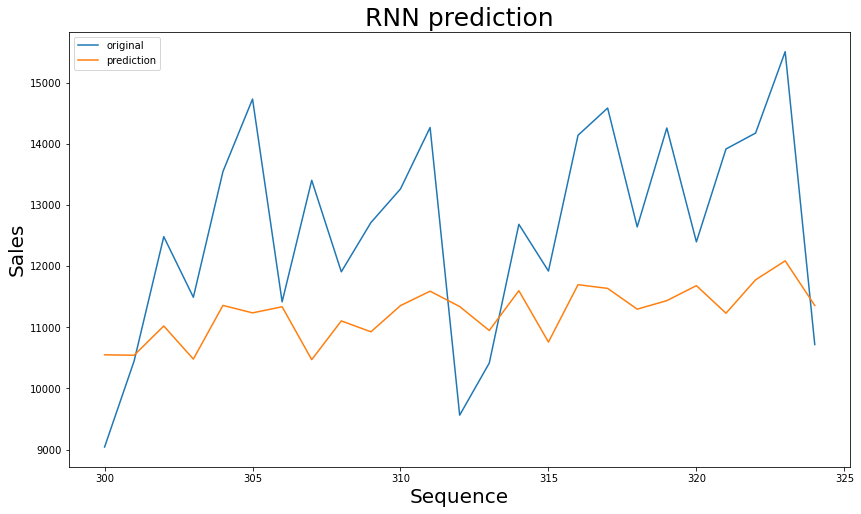

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 28ms/step - loss: 0.2121 - mae: 0.4012


[0.21213729679584503, 0.4011850655078888]